SQL Introduction
---
Besides the powerful python packages for database, pandas, polars, et.al,  most developers are familiar with SQL (Structured Query Language), which  is one of the easiest and most natural ways for developers to retrieve data and it is well-supported in Python. Here we introduce Duckdb", which is designed to support Online Analytical Processing (OLAP), i.e. we can utilize it online without complicated installation!
除了常用的資料庫函式庫 Pandas, polars 之外，常用的還有所謂的關聯性資料庫 (SQL)，他也是發展著常使用的資料存取系統，並且在 Python 之中，配合度高.我們將介紹一個 Duckdb，可以使用在即時的資料處理，而不需要太複雜的安裝程序.

Outlines
---
1. take the data,  取得資料
2. load the data as SQL  利用 SQL 處理資料，
3. example of SQL with query 使用 SQL 範例，
4. build artifact maker 建立雲端程式

```
Chapgpt Prompt (you can try by yourself) 

1. col1 for single selection of kinds
2. col2 for multiple selection of Countries
```

Bonus
===
[Hugging Face](https://huggingface.co/), a website, has emerged to collect and share those highly-specialized models, and we could implement artifact there, 另一個可以建立雲端程式的網站.
```
Sign Up and Sign In ➡︎ Spaces ➡︎ Create new Space ➡︎ Streamlit + create Space
```

After created the new space, HubbingFace should suggest how to setup the repo on HuggingFace, such like, 新增空間之後，網上將會建議如何去建立一個新的資源庫，如下:
```shell
git clone https://huggingface.co/spaces/Username/RepoName
```
Thus, create a folder, and enter into it, run above by changing `Username/ReopName` to `your account` and `reponame`. Now you can copy the files into this folder and commit them to `HuggingFace` or just use `startgit` to commit, 如同以前，在你的機器上面新增目錄並進到目錄裡面，然後將你的檔案複製到這個目錄裡面，建立機器上面的資源庫, 並上傳到 `HuggingHub` 網站，可以使用` smartgit` 代勞。 `HuggingFace` site should build this artifact if any commit and run it, 完成之後, `HuggingFace` 就會自動幫你建立雲端程式，如果沒有任何問題則即可上線使用. .


[HuggingFace Artifact](https://huggingface.co/spaces/cchuang2009/JobPosting)



In [1]:
# import packages 使用函式庫
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

import pandas as pd

%matplotlib inline

In [14]:
# Get the data 取得資料並產生資料架構

countries=['US','AU','CA','DE','FR','GB','IE','JP']

C=["https://raw.githubusercontent.com/hiring-lab/job_postings_tracker/master/{0}/aggregate_job_postings_{0}.csv".format(country,country) for country in countries]


In [15]:
# import  data  to Database
dfs=[pd.read_csv(c,parse_dates=['date']) for c in C]

df_world=pd.DataFrame()
df_world['date']=dfs[0]['date']
df_world['variable']=dfs[0]['variable']
for i in range(len(countries)):
    df_world[countries[i]]=dfs[i]['indeed_job_postings_index_SA']

df_world.reset_index(inplace=True,drop=True)

In [16]:
df_world

,date,variable,US,AU,CA,DE,FR,GB,IE,JP
0,2020-02-01,total postings,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,2020-02-02,total postings,99.98,100.06,100.08,100.01,99.95,99.95,99.91,99.64
2,2020-02-03,total postings,99.97,100.22,100.12,100.13,100.03,100.01,99.83,99.54
3,2020-02-04,total postings,100.03,100.36,100.18,99.71,99.86,99.95,99.67,99.15
4,2020-02-05,total postings,100.12,100.39,100.30,99.91,99.84,99.98,99.62,98.89
...,...,...,...,...,...,...,...,...,...,...
2305,2023-03-27,new postings,146.79,195.99,134.37,172.77,161.16,125.70,168.13,175.26
2306,2023-03-28,new postings,147.48,196.62,134.28,174.77,161.87,125.81,169.43,174.30
2307,2023-03-29,new postings,147.79,196.34,134.44,176.32,162.79,126.31,170.42,174.64
2308,2023-03-30,new postings,147.88,197.03,134.60,178.71,163.20,127.00,171.46,176.68


In [17]:
# packages for SQL
import sqlite3
import sqlalchemy as sa

In [18]:
# Create a connection to your SQL database 
# saved df_world to a file "Job.db" 將資料存成 SQL 檔案 
engine = sa.create_engine('sqlite:///job.db')

# Write the dataframe to a new SQL table named 'job'
df_world.to_sql('job', con=engine, if_exists='replace', index=False)

2310

In [19]:
df_world.to_csv("job.csv",index=False)

In [20]:
# Load SQL, 透過SQL語法讀取資料庫中的資料
conn = sqlite3.connect('job.db') 
SQL_df = pd.read_sql("SELECT * FROM job WHERE variable='new postings'", conn, parse_dates=['date'])
SQL_df

,date,variable,US,AU,CA,DE,FR,GB,IE,JP
0,2020-02-01,new postings,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,2020-02-02,new postings,100.86,97.80,100.17,100.92,100.02,100.24,100.21,100.43
2,2020-02-03,new postings,101.71,97.92,100.37,101.70,100.11,100.43,100.39,102.56
3,2020-02-04,new postings,101.99,98.95,100.58,100.93,99.03,100.02,100.02,101.64
4,2020-02-05,new postings,102.21,99.14,100.88,101.74,98.75,99.91,100.28,101.54
...,...,...,...,...,...,...,...,...,...,...
1150,2023-03-27,new postings,146.79,195.99,134.37,172.77,161.16,125.70,168.13,175.26
1151,2023-03-28,new postings,147.48,196.62,134.28,174.77,161.87,125.81,169.43,174.30
1152,2023-03-29,new postings,147.79,196.34,134.44,176.32,162.79,126.31,170.42,174.64
1153,2023-03-30,new postings,147.88,197.03,134.60,178.71,163.20,127.00,171.46,176.68


In [17]:
SQL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1155 non-null   datetime64[ns]
 1   variable  1155 non-null   object        
 2   US        1155 non-null   float64       
 3   AU        1155 non-null   float64       
 4   CA        1155 non-null   float64       
 5   DE        1155 non-null   float64       
 6   FR        1155 non-null   float64       
 7   GB        1155 non-null   float64       
 8   IE        1155 non-null   float64       
 9   JP        1155 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 90.4+ KB


Duckdb
---

In [14]:
import duckdb

con = duckdb.connect(database='Job.db', read_only=True) 

In [15]:
# list the first 5 data
data_query = "FROM 'job' LIMIT 5"
con.execute(data_query).df()

,date,variable,US,AU,CA,DE,FR,GB,IE,JP
0,2020-02-01,total postings,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,2020-02-02,total postings,99.98,100.06,100.08,100.01,99.95,99.95,99.91,99.64
2,2020-02-03,total postings,99.97,100.22,100.12,100.13,100.03,100.01,99.83,99.54
3,2020-02-04,total postings,100.03,100.36,100.18,99.71,99.86,99.95,99.67,99.15
4,2020-02-05,total postings,100.12,100.39,100.30,99.91,99.84,99.98,99.62,98.89


In [16]:
# query for distinct values in variable and display ordered
query="""
SELECT 
     DISTINCT variable
From job        
ORDER BY variable       
"""

con.execute(query).df()

,variable
0,new postings
1,total postings


In [17]:
# query for all (date, US) paired data and variable=new postings
query_1="""
SELECT 
        date,US 
From job        
WHERE variable =  'new postings'          
"""

con.execute(query_1).df()

,date,US
0,2020-02-01,100.00
1,2020-02-02,100.86
2,2020-02-03,101.71
3,2020-02-04,101.99
4,2020-02-05,102.21
...,...,...
1150,2023-03-27,146.79
1151,2023-03-28,147.48
1152,2023-03-29,147.79
1153,2023-03-30,147.88


Self-Practicing
---
Query all the data pairs (date, US,JP) with variable="total postings", 自行練習將滿足條件 variable="total postings" 資料 (date, US,JP) 取出

Streamlit Artifact
---

In [19]:
import streamlit as st
import altair as alt

In [20]:
# query for all data
query="""
   SELECT * 
   FROM Job
"""
#date=list(con.execute(query).df().columns)[0]
#kinds=list(con.execute(query).df().columns)[1]
Countries=list(con.execute(query).df().columns)[2:]

In [22]:
con.execute(query).df()

,date,variable,US,AU,CA,DE,FR,GB,IE,JP
0,2020-02-01,total postings,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,2020-02-02,total postings,99.98,100.06,100.08,100.01,99.95,99.95,99.91,99.64
2,2020-02-03,total postings,99.97,100.22,100.12,100.13,100.03,100.01,99.83,99.54
3,2020-02-04,total postings,100.03,100.36,100.18,99.71,99.86,99.95,99.67,99.15
4,2020-02-05,total postings,100.12,100.39,100.30,99.91,99.84,99.98,99.62,98.89
...,...,...,...,...,...,...,...,...,...,...
2305,2023-03-27,new postings,146.79,195.99,134.37,172.77,161.16,125.70,168.13,175.26
2306,2023-03-28,new postings,147.48,196.62,134.28,174.77,161.87,125.81,169.43,174.30
2307,2023-03-29,new postings,147.79,196.34,134.44,176.32,162.79,126.31,170.42,174.64
2308,2023-03-30,new postings,147.88,197.03,134.60,178.71,163.20,127.00,171.46,176.68


Notice
---
Streamlit artifact is availed for web-service, 主要是用來發展雲端程式; this means it would only work while the server is up and worked without error, 換句話說必須具備伺服器系統程式正常啟動才可以運作. If you have install a completed python environment, (for instance, Anaconda Jupyter, VS code + Python", 如果你已經安裝完整的 Python 環境，例如 Anaconda Jupyter 或者 VS code + Python, you can activate streamlit artifact, app.py, in console, 可以在文字介面中利用下列方式啟動雲端程式測試:
```shell
streamlit run app.py
```
and test by the IP address: 
```
localhost:8501
```

Code Explanation
---
Two single-select options, one for "variable", and the other for "country" (multiple-selection), 雲端程式包含兩個選項，一個選擇資料型態，一個選擇國家（複選).

In [8]:
st.subheader('Filters')

col1, col2 = st.columns(2)

with col1:
    query="""
            SELECT 
                 DISTINCT variable
            From job        
            ORDER BY variable       
          """

    kinds=con.execute(query).df()
    kind = st.selectbox('Kind of Statistics',kinds)
with col2: 
    country = st.selectbox('Country',Countries)


  command:

    streamlit run /Users/chu-chinghuang/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]
2023-04-07 22:23:51.382 
  command:

    streamlit run /Users/chu-chinghuang/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]


Full Code, app.py
---
```
import pandas as pd
import streamlit as st

import altair as alt
import duckdb

con = duckdb.connect(database='Job.db', read_only=True) 

# Countries
query="""
   SELECT * 
   FROM job
"""
Countries=list(con.execute(query).df().columns)[2:]


st.subheader('Investingation')

col1, col2 = st.columns(2)

with col1:
    query="""
            SELECT 
                 DISTINCT variable
            From job        
            ORDER BY variable       
          """

    kinds=con.execute(query).df()
    kind = st.selectbox('Kind of Statistics',kinds)
with col2: 
    country = st.selectbox('Country',Countries)
    

result_df = con.execute("""
    SELECT 
        *
    FROM Job 
    WHERE variable=?
    """, [kind]).df()

chart = alt.Chart(result_df).mark_circle().encode(
    x = 'date',
    y = country,
    #color = 'carrier'
).interactive()
st.altair_chart(chart, theme="streamlit", use_container_width=True)
    
```

Finally
---
1. create a folder, named "streamlit-SQL", 新增一個目錄，命名為 "streamlit-SQL"，
2. copy `app.py, Job.db`, into this folder, 將檔案  `app.py, Job.db` 拷貝到目錄中
3. also create a file, requirements.txt, which includes packages required in artifact, 並且新增一個檔案，requirements.txt，裡面包含雲端程式所需要的函式庫，如下:
```
dockdb
altair
```
4. create new github and push files into repo, 新增給他資源庫，並將上述檔案上傳;
5. sign in streamlit official to create artifact，到 streamlit 官方網站設定遠端程式. 

[Streamlit Artifact](https://cchuang2009-streamlit-sql-app-68vvn2.streamlit.app/)

In [ ]:
!pip install duckdb-engine sqlalchemy

In [11]:
engine = sa.create_engine('duckdb:///Job.duckdb')

# Write the dataframe to a new SQL table named 'job'
df_world.to_sql('job', con=engine, if_exists='replace', index=False)

-1

In [17]:
con = duckdb.connect(database='Job.duckdb')
#preview_data_query = "SELECT COUNT(*) FROM 'itineraries_snappy.parquet'"
#con.execute(preview_data_query).df()
data_df = pd.read_sql("SELECT * FROM job where variable='total postings'", con,parse_dates=['date'])
data_df

<ipython-input-17-d883c91b8c54>:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_df = pd.read_sql("SELECT * FROM job where variable='total postings'", con,parse_dates=['date'])


,date,variable,US,AU,CA,DE,FR,GB,IE,JP
0,2020-02-01,total postings,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,2020-02-02,total postings,99.98,100.06,100.08,100.01,99.95,99.95,99.91,99.64
2,2020-02-03,total postings,99.97,100.22,100.12,100.13,100.03,100.01,99.83,99.54
3,2020-02-04,total postings,100.03,100.36,100.18,99.71,99.86,99.95,99.67,99.15
4,2020-02-05,total postings,100.12,100.39,100.30,99.91,99.84,99.98,99.62,98.89
...,...,...,...,...,...,...,...,...,...,...
1150,2023-03-27,total postings,134.10,208.37,144.05,147.28,164.48,125.68,159.34,126.96
1151,2023-03-28,total postings,133.98,209.06,143.87,147.42,164.27,125.46,159.21,126.46
1152,2023-03-29,total postings,133.88,209.37,143.79,147.55,164.61,125.39,158.93,126.05
1153,2023-03-30,total postings,133.93,209.84,143.95,147.71,164.66,125.38,158.61,125.64


Measurement of Similarity of Time-series data
---
In the csv data, https://raw.githubusercontent.com/cchuang2009/streamlit-SQL/main/job.csv
how to measure the similarity of time series among ['US','AU','CA','DE','FR','GB','IE','JP'] columns



1. Dynamic Time Warping (DTW): DTW is a popular technique for measuring the similarity between two time series, even if they have different lengths and speed. It works by finding the optimal alignment between two time series that minimizes the difference between them. DTW can be used to measure the similarity between each pair of columns in the csv data.

2. Pearson Correlation Coefficient: Pearson correlation measures the linear correlation between two time series. It ranges from -1 to 1, where -1 means perfect negative correlation, 0 means no correlation, and 1 means perfect positive correlation. You can compute the Pearson correlation coefficient between each pair of columns in the csv data.

In [22]:
!pip install dtw dtaidistance

  Preparing metadata (setup.py) ... done
  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5301 sha256=e36b4820277964b15e9184641048a754c70c6ff219e7d787aaa2cb4f175ee6d6
  Stored in directory: /Users/chu-chinghuang/Library/Caches/pip/wheels/5b/cc/44/62f60769f89e834ab2124c69de4005c771e0ff06af908bbbf3
Successfully built dtw


In [48]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
from tqdm import tqdm

In [43]:
df_world.index=df_world['date']

In [44]:
df_weekly = df_world.resample('W').mean()
df_ = df_weekly[columns]

<ipython-input-44-580483bfbf6a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [113]:
df1=pd.DataFrame()
df1[['US','CA']]=df_[['US','CA']]
df1.index=range(len(df1))
path = dtw.warping_path(df1['US'], df1['CA'])
dtwvis.plot_warping(df1['US'], df1['CA'], path, filename="warp1.png")

(None, None)

In [114]:
df1

,US,CA
0,100.210000,100.062500
1,101.850714,101.734286
2,104.790714,106.019286
3,101.195714,100.994286
4,100.072143,101.187143
...,...,...
161,142.527857,142.200714
162,143.100000,138.585714
163,143.436429,142.078571
164,141.007857,140.576429


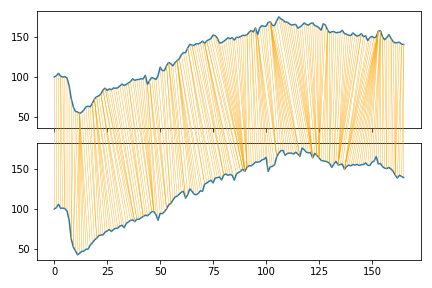

In [115]:
Image("warp1.png",width=800)

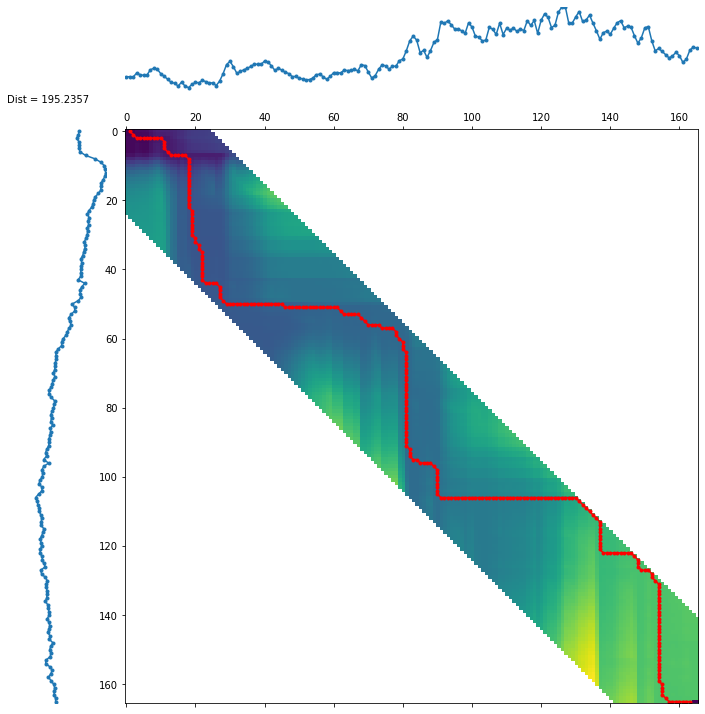

In [71]:
dist, paths = dtw.warping_paths(df_['US'], df_['JP'], window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(df_['US'], df_['JP'], paths, best_path);

In [55]:
# Select the columns of interest
columns = ['US','AU','CA','DE','FR','GB','IE','JP']
df = df_[columns]

# Compute the DTW distance between each pair of columns
dtw_distances = np.zeros((len(columns), len(columns)))
for i, col1 in tqdm(enumerate(columns), total=len(columns)):
    for j, col2 in enumerate(columns):
        if i == j:
            dtw_distances[i,j] = 0
        else:
            dist, _ = dtw.warping_paths(df[col1], df[col2])
            #dist, _ = dtw_distance(df[col1], df[col2])
            dtw_distances[i,j] = dist

# Print the DTW distances
print('DTW distances:')
print(pd.DataFrame(dtw_distances, columns=columns, index=columns))


100%|██████████| 8/8 [00:06<00:00,  1.28it/s]

DTW distances:
            US          AU          CA          DE          FR          GB  \
US    0.000000  436.476136   39.023081   78.378725   72.678560  119.165048   
AU  436.476136    0.000000  414.580463  261.535518  329.332652  592.955659   
CA   39.023081  414.580463    0.000000   99.099010   69.221881   99.808690   
DE   78.378725  261.535518   99.099010    0.000000   88.065458  238.669480   
FR   72.678560  329.332652   69.221881   88.065458    0.000000  137.015424   
GB  119.165048  592.955659   99.808690  238.669480  137.015424    0.000000   
IE   79.868835  398.146734   70.003901  121.712035   57.787417  144.294876   
JP  185.044567  252.236276  202.673123  138.780717  199.120727  383.828531   

            IE          JP  
US   79.868835  185.044567  
AU  398.146734  252.236276  
CA   70.003901  202.673123  
DE  121.712035  138.780717  
FR   57.787417  199.120727  
GB  144.294876  383.828531  
IE    0.000000  250.899788  
JP  250.899788    0.000000  


In [56]:
from scipy.stats import pearsonr
# Compute the Pearson correlation coefficient between each pair of columns
pearson_corrs = np.zeros((len(columns), len(columns)))
for i, col1 in tqdm(enumerate(columns), total=len(columns)):
    for j, col2 in enumerate(columns):
        if i == j:
            pearson_corrs[i,j] = 1
        else:
            corr, _ = pearsonr(df[col1], df[col2])
            pearson_corrs[i,j] = corr

# Print the Pearson correlation coefficients
print('Pearson correlation coefficients:')
print(pd.DataFrame(pearson_corrs, columns=columns, index=columns))


100%|██████████| 8/8 [00:00<00:00, 469.35it/s]

Pearson correlation coefficients:
          US        AU        CA        DE        FR        GB        IE  \
US  1.000000  0.931355  0.983134  0.879268  0.858872  0.955360  0.934234   
AU  0.931355  1.000000  0.960586  0.962890  0.937988  0.937794  0.958442   
CA  0.983134  0.960586  1.000000  0.923892  0.894965  0.972491  0.964342   
DE  0.879268  0.962890  0.923892  1.000000  0.964658  0.925675  0.967079   
FR  0.858872  0.937988  0.894965  0.964658  1.000000  0.890555  0.937923   
GB  0.955360  0.937794  0.972491  0.925675  0.890555  1.000000  0.978114   
IE  0.934234  0.958442  0.964342  0.967079  0.937923  0.978114  1.000000   
JP  0.806223  0.868423  0.846406  0.832901  0.736801  0.845383  0.847468   

          JP  
US  0.806223  
AU  0.868423  
CA  0.846406  
DE  0.832901  
FR  0.736801  
GB  0.845383  
IE  0.847468  
JP  1.000000  


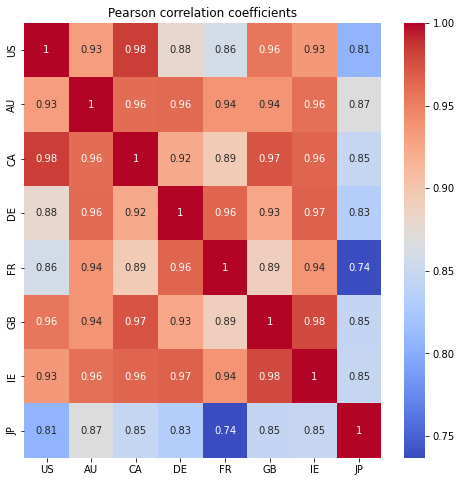

In [82]:
# Create a heatmap of the Pearson correlation coefficients
plt.figure(figsize=(8, 8))
sns.heatmap(pearson_corrs, annot=True, cmap='coolwarm', xticklabels=columns, yticklabels=columns)
plt.title('Pearson correlation coefficients')

plt.show()

100%|██████████| 8/8 [00:00<00:00, 1181.00it/s]


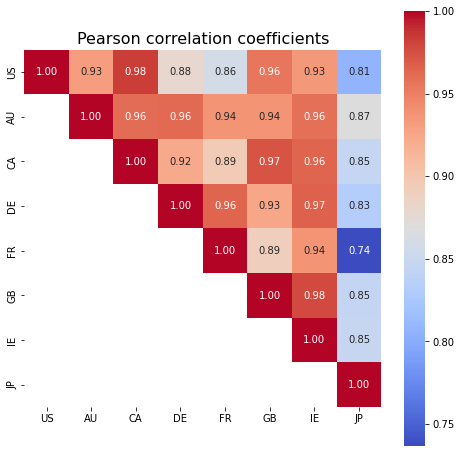

In [109]:
# Create a heatmap of the Pearson correlation coefficients

# Compute the Pearson correlation coefficient between each pair of columns
pearson_corrs = np.zeros((len(columns), len(columns)))
for i, col1 in tqdm(enumerate(columns), total=len(columns)):
    for j, col2 in enumerate(columns):
        if i <= j:
            corr, _ = pearsonr(df_weekly[col1], df_weekly[col2])
            pearson_corrs[i,j] = corr

# Create a heatmap of the Pearson correlation coefficients
plt.figure(figsize=[8,8])
mask = np.zeros_like(pearson_corrs, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(pearson_corrs, mask=~mask, cmap='coolwarm', annot=True, fmt='.2f', square=True, xticklabels=columns, yticklabels=columns)

plt.title('Pearson correlation coefficients',size=16);